In [109]:
columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
           'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins',
           'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
           'num_root', 'num_file_creations', 'num_shells', 'num_access_files',
           'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
           'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
           'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
           'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
           'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
           'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
           'dst_host_serror_rate', 'dst_host_srv_serror_rate',
           'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'labels']
len(columns)

42

In [86]:
import pandas as pd

train_df = pd.read_csv(r"D:\Final_Year_Project\Hybrid_Anomaly_Detection\dataset\kdd_train.csv")
test_df  = pd.read_csv(r"D:\Final_Year_Project\Hybrid_Anomaly_Detection\dataset\kdd_test.csv")

print("Train:", train_df.shape)
print("Test :", test_df.shape)


Train: (125973, 42)
Test : (22544, 42)


In [107]:
train_df.rename(columns={"labels": "label"}, inplace=True)
test_df.rename(columns={"labels": "label"}, inplace=True)


In [112]:
train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0


In [113]:
test_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,5,tcp,smtp,SF,2429,475,0,0,0,0,...,57,0.11,0.02,0.01,0.04,0.0,0.0,0.87,0.0,0
1,0,udp,domain_u,SF,45,134,0,0,0,0,...,155,0.80,0.02,0.01,0.00,0.0,0.0,0.00,0.0,0
2,0,udp,domain_u,SF,45,80,0,0,0,0,...,255,1.00,0.00,0.01,0.00,0.0,0.0,0.00,0.0,0
3,1979,udp,other,SF,145,105,0,0,0,0,...,2,0.01,0.84,1.00,0.00,0.0,0.0,0.00,0.0,0
4,14462,tcp,other,RSTR,1,0,0,0,0,0,...,2,0.01,0.68,1.00,0.00,0.0,0.0,1.00,1.0,1


In [115]:
train_df.duplicated().sum()

np.int64(9)

In [116]:
train_df = train_df.drop_duplicates()
print("Train Shape After Removing Duplicates:", train_df.shape)

Train Shape After Removing Duplicates: (125964, 42)


In [119]:
train_df.duplicated().sum() 

np.int64(0)

In [122]:
# If label is still string, convert
if train_df['label'].dtype == 'object':
    train_df['label'] = train_df['label'].str.strip()
    train_df['label'] = (train_df['label'] != 'normal').astype(int)

if test_df['label'].dtype == 'object':
    test_df['label'] = test_df['label'].str.strip()
    test_df['label'] = (test_df['label'] != 'normal').astype(int)


In [123]:
print(train_df['label'].dtype)
print(train_df['label'].unique())



int64
[0 1]


In [124]:
X_train = train_df.drop("label", axis=1)
y_train = train_df["label"]

X_test = test_df.drop("label", axis=1)
y_test = test_df["label"]


In [125]:
combined = pd.concat([X_train, X_test], axis=0)

combined_encoded = pd.get_dummies(combined)

# Split back
X_train_encoded = combined_encoded.iloc[:len(X_train), :]
X_test_encoded  = combined_encoded.iloc[len(X_train):, :]

print("Encoded Train Shape:", X_train_encoded.shape)
print("Encoded Test Shape:", X_test_encoded.shape)

Encoded Train Shape: (125964, 122)
Encoded Test Shape: (22544, 122)


In [128]:
from sklearn.preprocessing import StandardScaler
import joblib
import os
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled  = scaler.transform(X_test_encoded)

# Create models folder if not exists
os.makedirs("models", exist_ok=True)

joblib.dump(scaler, "models/scaler.pkl")

['models/scaler.pkl']

In [129]:
X_train_final = pd.DataFrame(X_train_scaled, columns=X_train_encoded.columns)
X_test_final  = pd.DataFrame(X_test_scaled, columns=X_test_encoded.columns)

X_train_final["label"] = y_train.values
X_test_final["label"]  = y_test.values


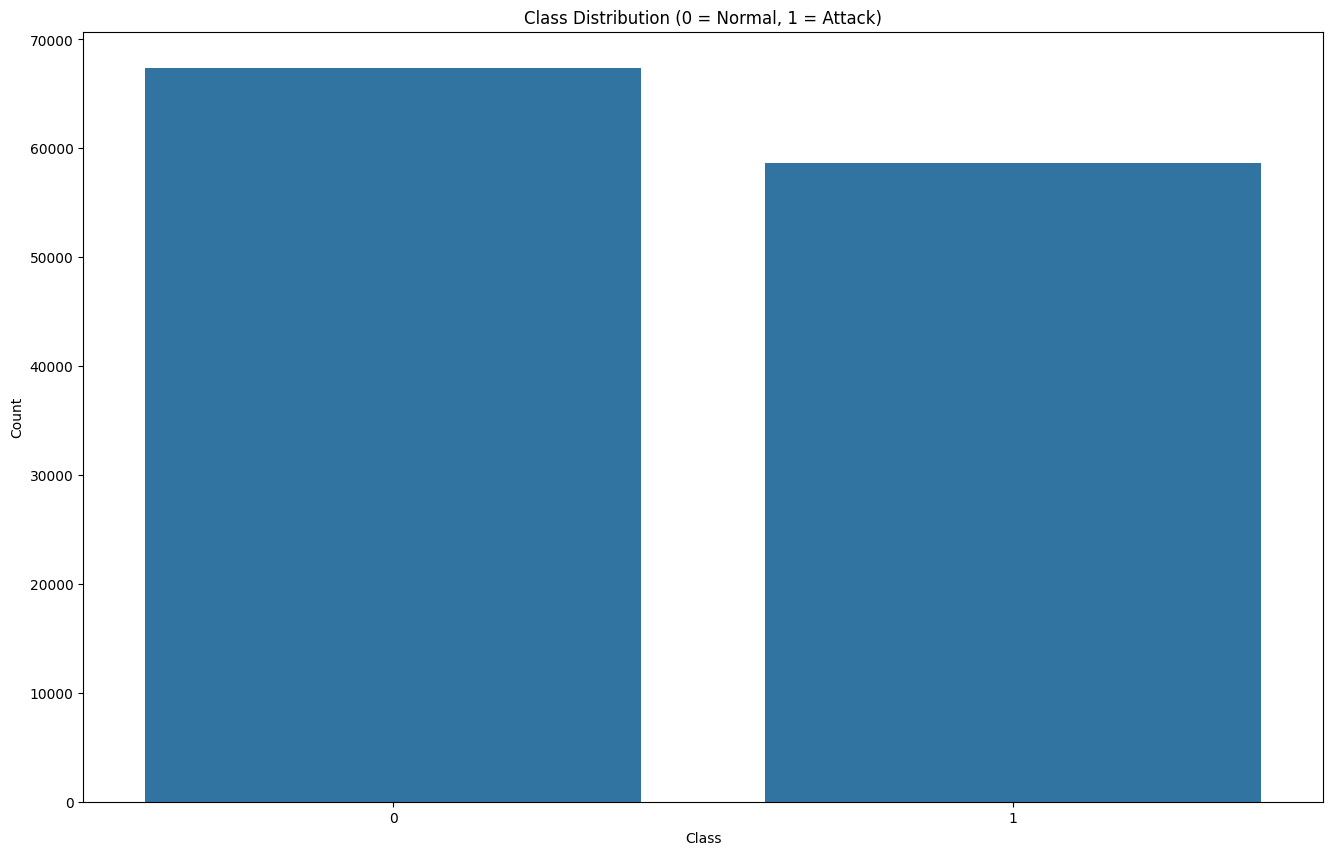

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,10))
sns.countplot(x='label', data=train_df)
plt.title("Class Distribution (0 = Normal, 1 = Attack)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


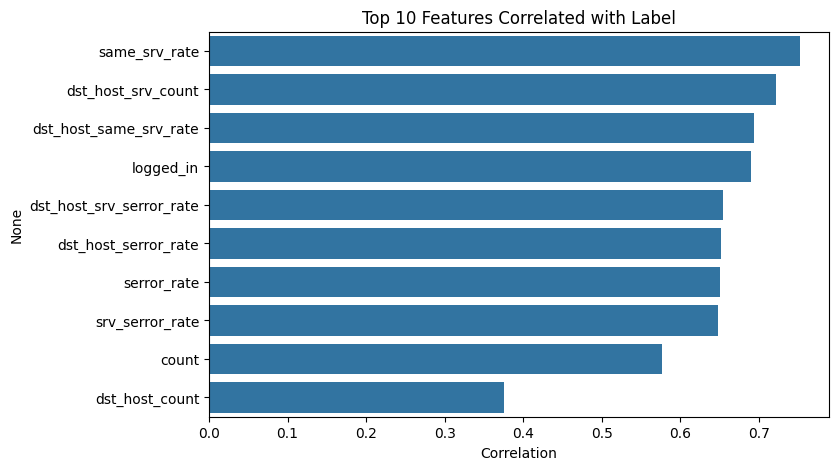

In [131]:
numeric_df = train_df.select_dtypes(include=['int64', 'float64'])

corr = numeric_df.corr()['label'].abs().sort_values(ascending=False)

top_corr = corr[1:11]  # exclude label itself

plt.figure(figsize=(8,5))
sns.barplot(x=top_corr.values, y=top_corr.index)
plt.title("Top 10 Features Correlated with Label")
plt.xlabel("Correlation")
plt.show()


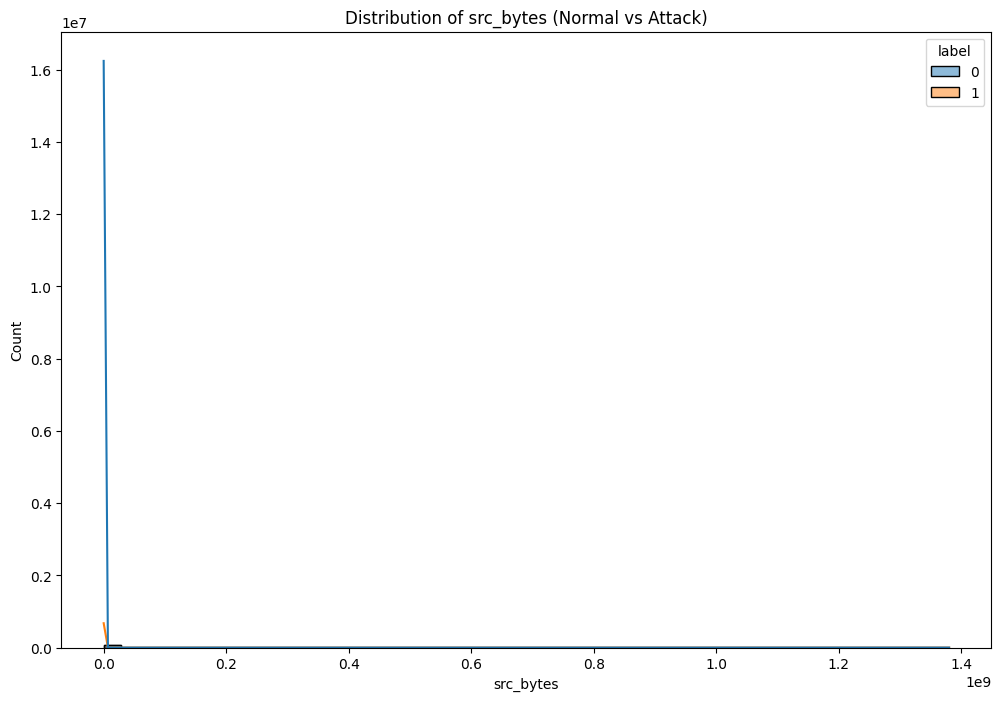

In [132]:
plt.figure(figsize=(12,8))
sns.histplot(data=train_df, x='src_bytes', hue='label', bins=50, kde=True)
plt.title("Distribution of src_bytes (Normal vs Attack)")
plt.show()


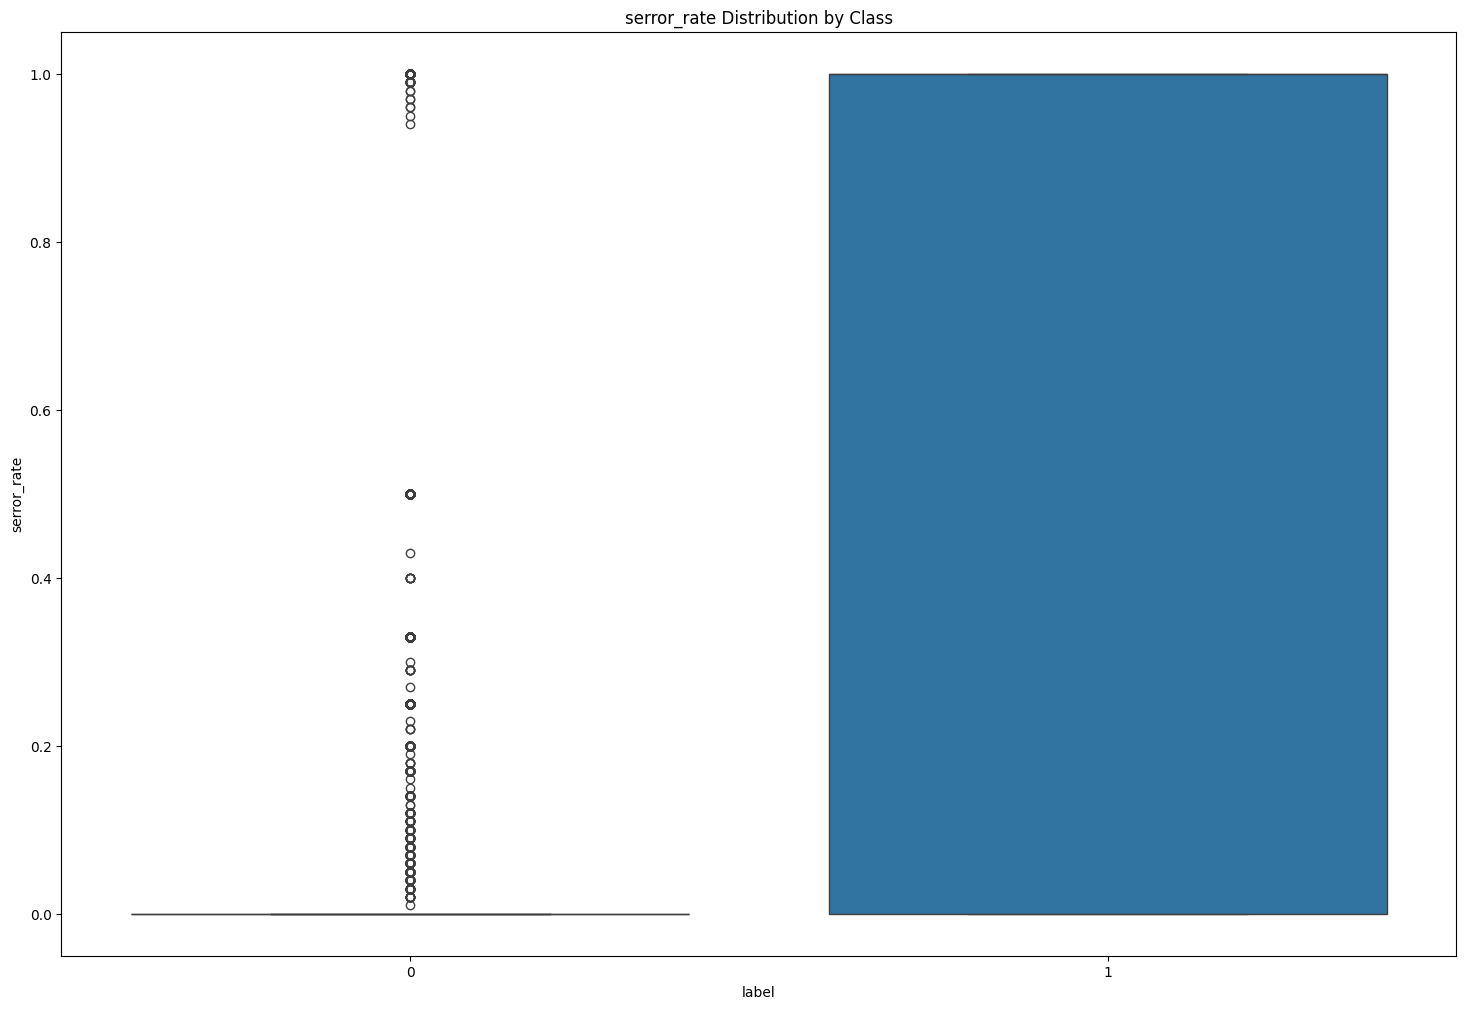

In [133]:
plt.figure(figsize=(18,12))
sns.boxplot(x='label', y='serror_rate', data=train_df)
plt.title("serror_rate Distribution by Class")
plt.show()


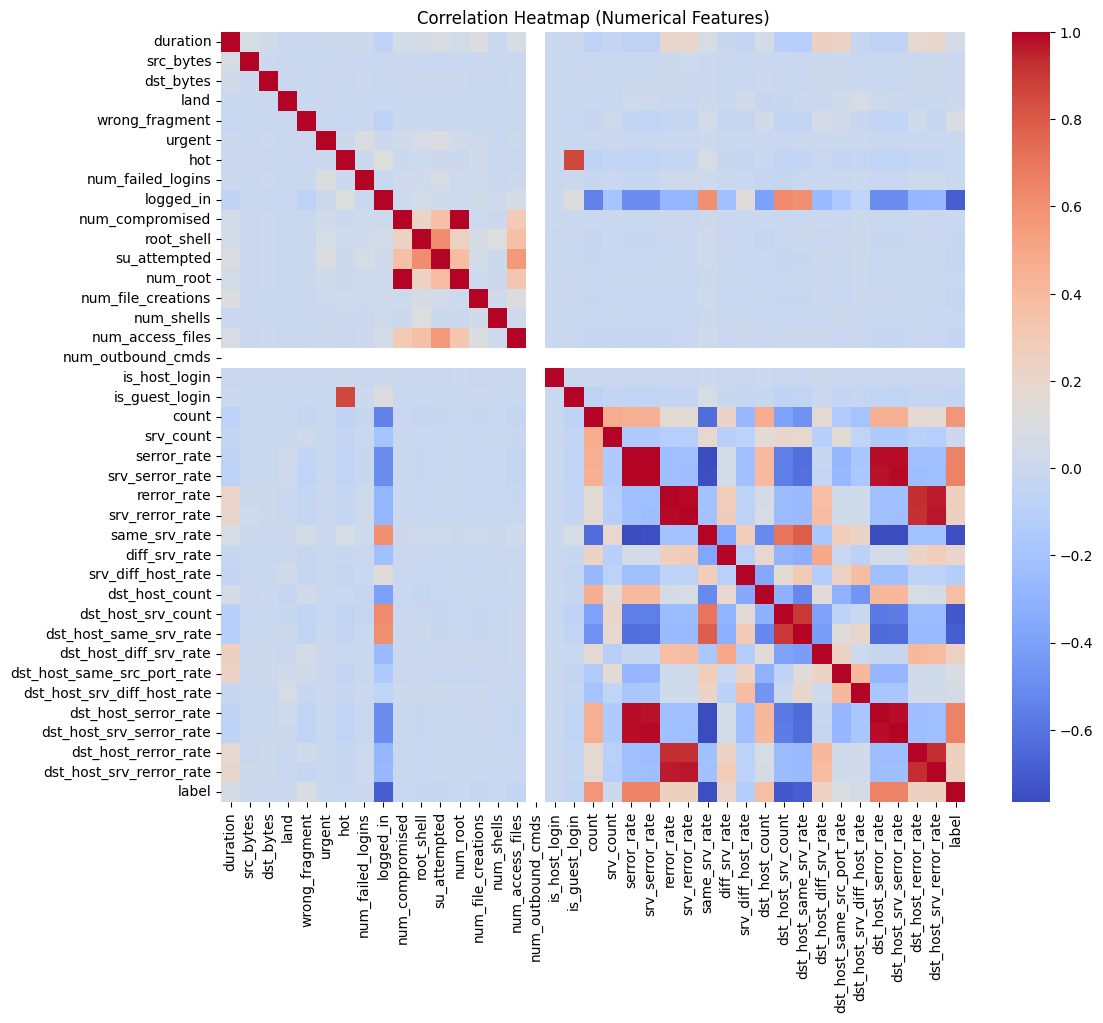

In [134]:
numeric_df = train_df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12,10))
sns.heatmap(numeric_df.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()


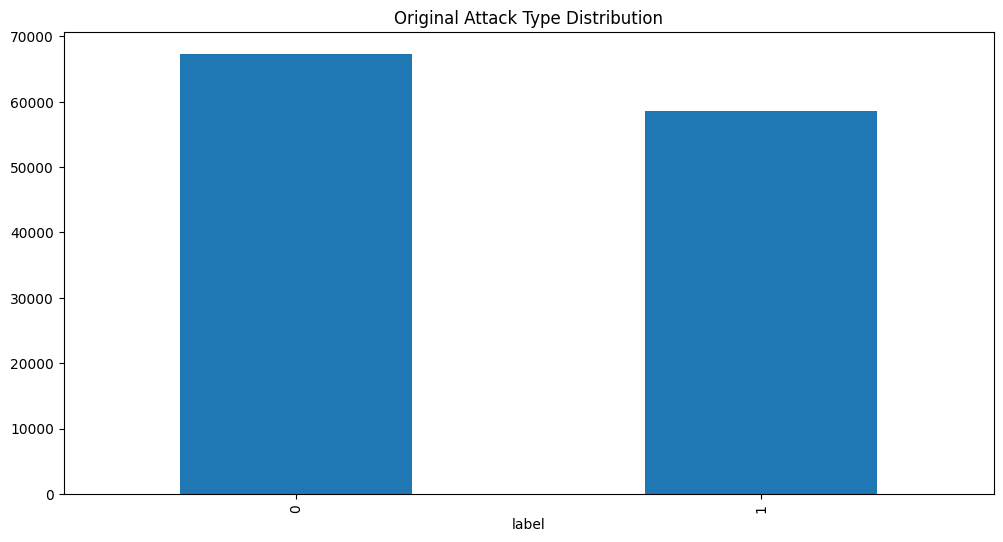

In [135]:
plt.figure(figsize=(12,6))
train_df['label'].value_counts().plot(kind='bar')
plt.title("Original Attack Type Distribution")
plt.xticks(rotation=90)
plt.show()


In [136]:
a=train_df['label'].unique()
print(a)

[0 1]


In [137]:
X_train_final.to_csv(
    r"D:\Final_Year_Project\Hybrid_Anomaly_Detection\processed_data\kdd_train_cleaned.csv",
    index=False
)

X_test_final.to_csv(
    r"D:\Final_Year_Project\Hybrid_Anomaly_Detection\processed_data\kdd_test_cleaned.csv",
    index=False
)

print("\nCleaned datasets saved successfully.")


Cleaned datasets saved successfully.
